In [1]:
import torch
import torch.nn as nn

import numpy as np

import matplotlib.pyplot as plt


from sklearn import datasets

In [2]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.2, factor=0.3)

In [3]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

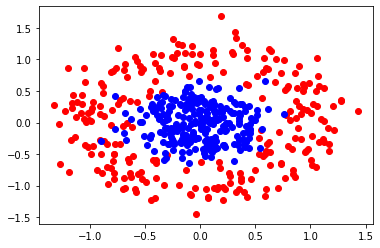

In [5]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
    plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')

scatter_plot()

In [7]:
class Model(nn.Module):
  
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
    
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x
  
    def predict(self, x):
        return 1 if self.forward(x) >= 0.5 else 0

In [8]:
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0265, -0.5855],
        [ 0.4121, -0.6234],
        [ 0.0941,  0.3647],
        [-0.3723, -0.4288]], requires_grad=True), Parameter containing:
tensor([ 0.0410, -0.2321,  0.0436,  0.5619], requires_grad=True), Parameter containing:
tensor([[ 0.2874,  0.1196, -0.4745, -0.1889]], requires_grad=True), Parameter containing:
tensor([-0.0742], requires_grad=True)]


In [9]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [12]:
epochs = 1000
losses = []

for i in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)

    print("epochs: {}, loss: {}".format(i, loss.item()))

    losses.append(loss.item())
    loss.backward()
    optimizer.step()

epochs: 0, loss: 0.7001765370368958
epochs: 1, loss: 0.6982941627502441
epochs: 2, loss: 0.6967012286186218
epochs: 3, loss: 0.6954004764556885
epochs: 4, loss: 0.6943888664245605
epochs: 5, loss: 0.6936563849449158
epochs: 6, loss: 0.693183422088623
epochs: 7, loss: 0.6929389238357544
epochs: 8, loss: 0.6928805708885193
epochs: 9, loss: 0.6929565072059631
epochs: 10, loss: 0.6931098699569702
epochs: 11, loss: 0.6932865381240845
epochs: 12, loss: 0.6934416890144348
epochs: 13, loss: 0.693544864654541
epochs: 14, loss: 0.6935815811157227
epochs: 15, loss: 0.6935509443283081
epochs: 16, loss: 0.6934624910354614
epochs: 17, loss: 0.6933320164680481
epochs: 18, loss: 0.6931782364845276
epochs: 19, loss: 0.6930192112922668
epochs: 20, loss: 0.6928708553314209
epochs: 21, loss: 0.6927449107170105
epochs: 22, loss: 0.6926488876342773
epochs: 23, loss: 0.6925849318504333
epochs: 24, loss: 0.6925510168075562
epochs: 25, loss: 0.6925413012504578
epochs: 26, loss: 0.692547619342804
epochs: 27, lo

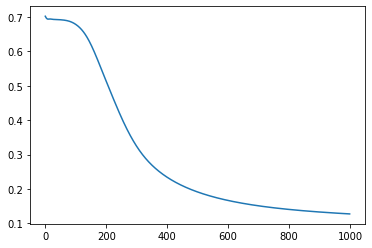

In [ ]:
plt.plot(range(epochs), losses)


In [13]:
def plot_decision_boundary(X, y):
    # x축 y축 min max 값을 구해 그래프의 상하좌우 길이를 세팅한다.
    x_span = np.linspace(min(X[:, 0]), max(X[:, 0]))
    y_span = np.linspace(min(X[:, 1]), max(X[:, 1]))
    # 이 두개로 그리드를 만든다.
    xx, yy = np.meshgrid(x_span, y_span)
    # .ravel()로 평탄화 하고 이 둘을 합쳐 tensor로 변환한다.
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    # 값 예측
    pred_func = model(grid)
    # xx와 모양을 맞춰 그래프에 넣을 수 있게 세팅한다.
    # detach를 하여 autograd를 off한다.
    # numpy()로 변환하여 그래프를 그릴 수 있게 한다.
    z = pred_func.view(xx.shape).detach().numpy()
    # 등고선
    plt.contourf(xx, yy, z)


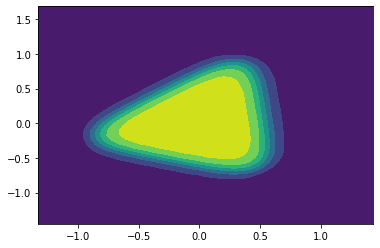

In [14]:
plot_decision_boundary(x_data, y_data)